In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib nbagg

<h1>Support Vector Machine</h1>
<p>Hereafter we study several application of Support Vector Machine (SVM) : classification, regression, etc...</p>

<h2>Classification</h2>

<h3>Fully linearly separable case</h3>
<p>We limit the study to two classes of the iris data set</p>

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[(iris.target==0)|(iris.target==1),0:3:2]
y = iris.target[(iris.target==0)|(iris.target==1)]

<IPython.core.display.Javascript object>


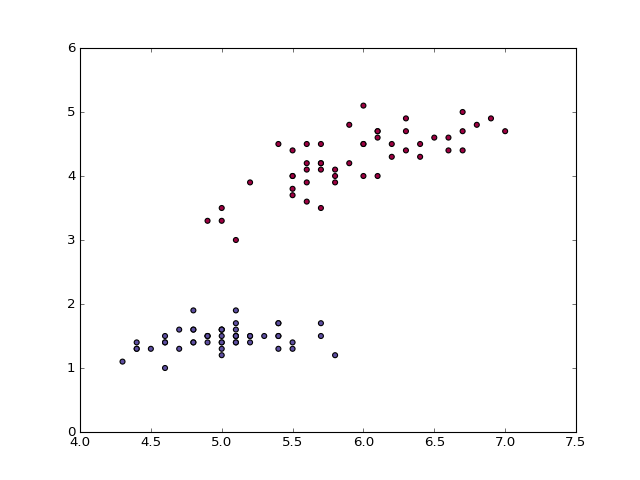

In [3]:
plt.scatter(X.T[0],X.T[1],c=y,cmap='Spectral_r')

In [4]:
#In order to perform well scikit recommends to scale the data

from sklearn.preprocessing import scale
X = scale(X)

<p>Now training the classifier :</p>

In [5]:
from sklearn.svm import LinearSVC

# A large valure for C leads to the hard margin case
lsvc = LinearSVC(C=100.0)
lsvc.fit(X,y)

LinearSVC(C=100.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

<p>Mapping the parameters space and visualizing the result</p>

In [6]:
xx,yy = np.meshgrid(np.linspace(-3.0,3.0,201),np.linspace(-2.0,2.0,201))

pred = lsvc.predict(np.c_[xx.ravel(),yy.ravel()])
Z_lsvc = pred.reshape(np.shape(xx))

<IPython.core.display.Javascript object>


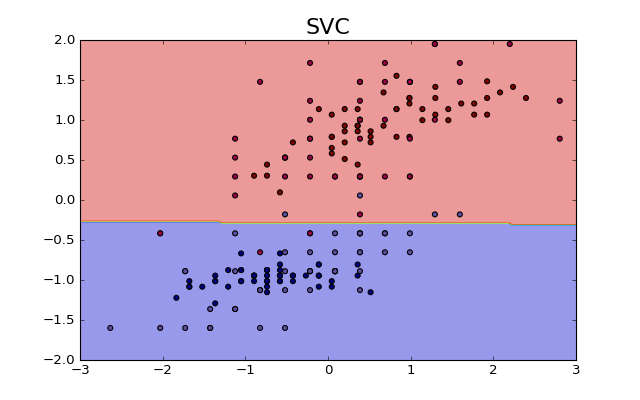

(-2.0, 2.0)

In [7]:
plt.figure(figsize=(8,5))

#plt.subplot(121)
plt.contourf(xx,yy,Z_lsvc,alpha=0.4)
plt.scatter(X.T[0],X.T[1],c=y)
#plt.axis('scaled')
plt.title('SVC',fontsize=20)
plt.xlim(-3.0,3.0)
plt.ylim(-2.0,2.0)

<h3>Not Fully Linearly Separable Case</h3>

<p>In the following we focus on a two classes non-fully linearly separable case</p>

In [9]:
from sklearn.datasets import load_iris
iris = load_iris()
X2 = iris.data[(iris.target==1)|(iris.target==2),1:4:2]
y2 = iris.target[(iris.target==1)|(iris.target==2)]

X2 = scale(X2)

plt.scatter(X2.T[0],X2.T[1],c=y,cmap='Spectral_r')

In [10]:
lsvc2 = LinearSVC(C=5.0)
lsvc2.fit(X2,y2)

LinearSVC(C=5.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [11]:
xx,yy = np.meshgrid(np.linspace(-4.0,4.0,201),np.linspace(-3.0,3.0,201))

pred2 = lsvc2.predict(np.c_[xx.ravel(),yy.ravel()])
Z_lsvc2 = pred2.reshape(np.shape(xx))

<IPython.core.display.Javascript object>


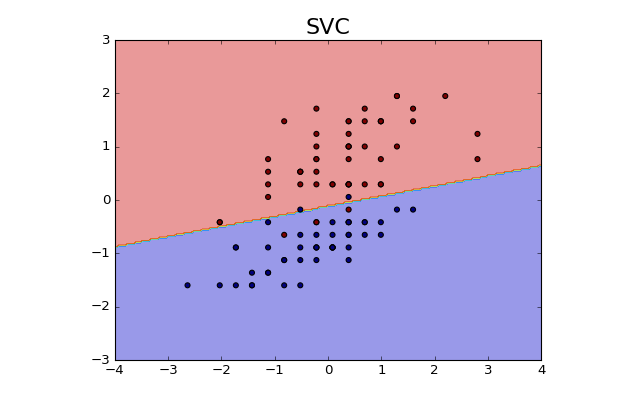

(-3.0, 3.0)

In [12]:
plt.figure(figsize=(8,5))

plt.contourf(xx,yy,Z_lsvc2,alpha=0.4)
plt.scatter(X2.T[0],X2.T[1],c=y2)
plt.axis('scaled')
plt.title('SVC',fontsize=20)
plt.xlim(-4.0,4.0)
plt.ylim(-3.0,3.0)

In [13]:
lsvc2.score(X2,y2)

0.93000000000000005

<h3>Kernel Trick</h3>

<p>From now we forget about LinearSVC and only use SVC with different Kernel<br>
<p>We first try to use the 'rbf' kernel and visualize the result.</p>

In [14]:
from sklearn.svm import SVC
svc1 = SVC(kernel='rbf',probability=True)
svc1.fit(X2,y2)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

<p>This time, instead of computing only the predicted classification we will study the predictions probability. It is basically telling me the probability that a new point belongs to the first class (setosa) ot to the second class (versicolor).<br>
In scikit it is very easy to compute using the ".predict_proba" function :</p>

In [15]:
xx,yy = np.meshgrid(np.linspace(-4.0,4.0,201),np.linspace(-3.0,3.0,201))

pred_svc1 = svc1.predict_proba(np.c_[xx.ravel(),yy.ravel()])
Z_svc1 = pred_svc1.reshape(201,201,2)
Z_svc1[Z_svc1<0.5]=np.nan

<p>Now <i>Z_svc1</i> contains is made of two layers.<br>
The first one is the probability map to belong to the first class and the second one is the probability map to belong to the second class.</p>
<p>Let's superimpose them on a single figure :</p>

<IPython.core.display.Javascript object>


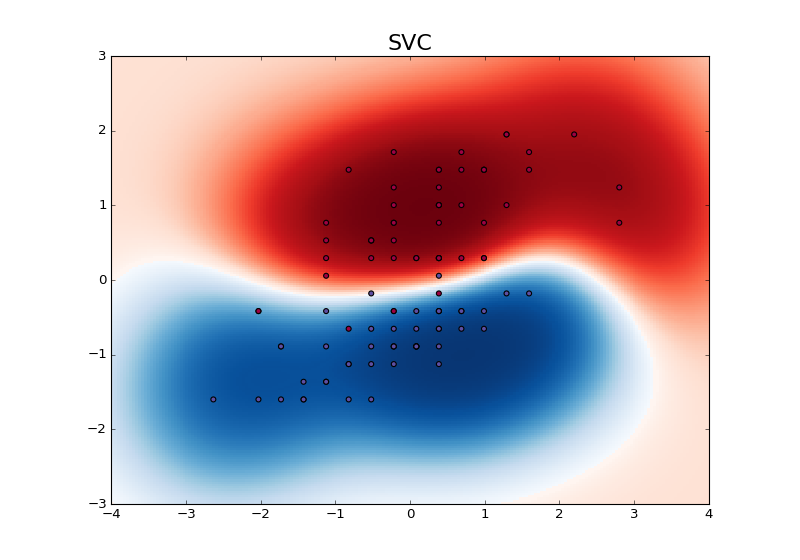

(-3.0, 3.0)

In [16]:
plt.figure(figsize=(10,7))

#The probability map for the first layer i.e. to belong to the first class :
plt.imshow(Z_svc1[:,:,0],vmin=0.5,vmax=1.0,extent=[-4.0,4.0,-3.0,3.0],cmap='Blues',origin='bottom',alpha=1.0)
#The probability map for the second layer i.e. to belong to the second class :
plt.imshow(Z_svc1[:,:,1],vmin=0.5,vmax=1.0,extent=[-4.0,4.0,-3.0,3.0],cmap='Reds',origin='bottom',alpha=1.0)

#The data set
plt.scatter(X2.T[0],X2.T[1],c=y2,cmap='Spectral_r')
plt.axis('scaled')
plt.title('SVC',fontsize=20)
plt.xlim(-4.0,4.0)
plt.ylim(-3.0,3.0)

<p>In the previous plot, points in the blue region are very likely to belong to the blue class while points in the red region are very likely to belong to the red class.<br>
In regions that are white it is more complicated to make a prediction. In other words the classification will be less certain.</p>

<p>Let's have now a very rough comparison between the four kernels : 'linear','poly','rbf' and 'sigmoid'</p>

<IPython.core.display.Javascript object>


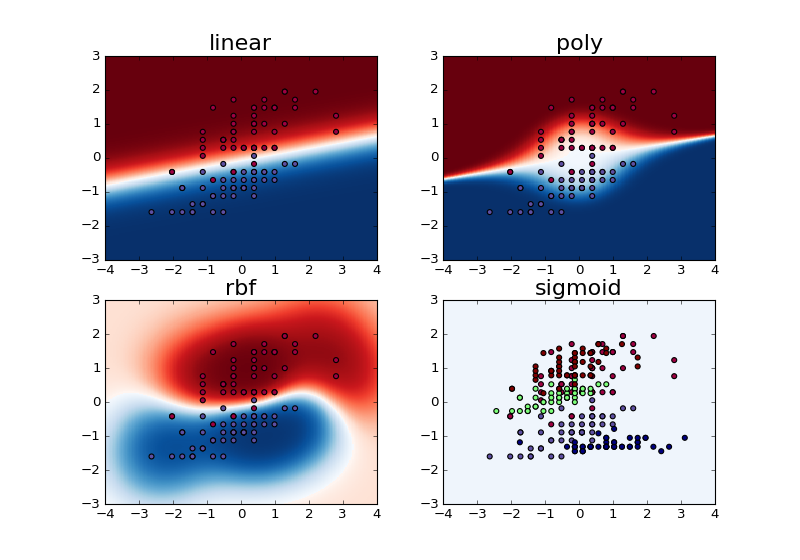

In [18]:
plt.figure(figsize=(10,7))

c=1
for i in ['linear','poly','rbf','sigmoid']:
    tmp_clf = SVC(kernel=i,probability=True)
    tmp_clf.fit(X2,y2)
    tmp_pred = tmp_clf.predict_proba(np.c_[xx.ravel(),yy.ravel()])
    tmp_Z = tmp_pred.reshape(201,201,2)
    tmp_Z[tmp_Z<0.5]=np.nan
    subplot(2,2,c)
    plt.imshow(tmp_Z[:,:,0],vmin=0.5,vmax=1.0,extent=[-4.0,4.0,-3.0,3.0],cmap='Blues',origin='bottom',alpha=1.0)
    plt.imshow(tmp_Z[:,:,1],vmin=0.5,vmax=1.0,extent=[-4.0,4.0,-3.0,3.0],cmap='Reds',origin='bottom',alpha=1.0)
    plt.scatter(X2.T[0],X2.T[1],c=y2,cmap='Spectral_r')
    plt.axis('scaled')
    plt.title(i,fontsize=20)
    plt.xlim(-4.0,4.0)
    plt.ylim(-3.0,3.0)
    c+=1

<p>As mentioned the comparison is very rough as each kernel has its own parameters to adjust for an optimal fit.<br>
In addition the choice of the kernel is mostly dictated by the data distribution, that's why using sigmoid here is not relevant.</p>

<h3>Multivariate Case</h3>

<p>It is very easy to extend SVC to a multivariate case adopting a <b>one-versus-one</b> (ovo) or <b>one-versus-the-rest</b> (ovr) approach.</p>

In [19]:
X3 = iris.data[:,1:4:2]
y3 = iris.target

X3 = scale(X3)
scatter(X3.T[0],X3.T[1],c=y3)

In [20]:
svc = SVC(kernel='rbf',decision_function_shape='ovo',probability=True)
svc.fit(X3,y3)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

<p>Again I prefer to focus on the prediction probability more than the prediction itself (<i>Z_svc hereafter will now have three layers as I have three classes).</i></p>

In [21]:
xx,yy = np.meshgrid(np.linspace(-4.0,4.0,201),np.linspace(-3.0,3.0,201))

pred_svc = svc.predict_proba(np.c_[xx.ravel(),yy.ravel()])
Z_svc = pred_svc.reshape(201,201,3)
Z_svc[Z_svc<0.5]=np.nan

<IPython.core.display.Javascript object>


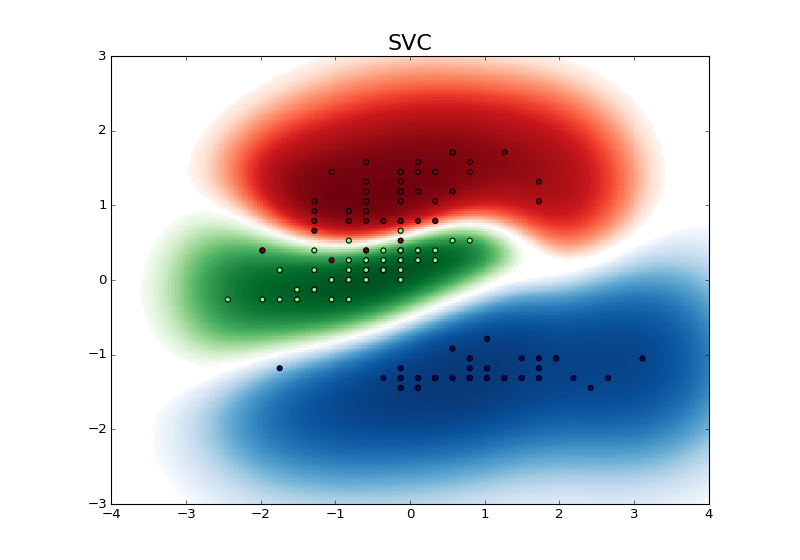

(-3.0, 3.0)

In [22]:
plt.figure(figsize=(10,7))

plt.imshow(Z_svc[:,:,0],vmin=0.5,vmax=1.0,extent=[-4.0,4.0,-3.0,3.0],cmap='Blues',origin='bottom',alpha=1.0)
plt.imshow(Z_svc[:,:,1],vmin=0.5,vmax=1.0,extent=[-4.0,4.0,-3.0,3.0],cmap='Greens',origin='bottom',alpha=1.0)
plt.imshow(Z_svc[:,:,2],vmin=0.5,vmax=1.0,extent=[-4.0,4.0,-3.0,3.0],cmap='Reds',origin='bottom',alpha=1.0)

#The data set
plt.scatter(X3.T[0],X3.T[1],c=y3)
plt.axis('scaled')
plt.title('SVC',fontsize=20)
plt.xlim(-4.0,4.0)
plt.ylim(-3.0,3.0)

<p>We can also play with C and gamma the two important parameters when using SVC with a 'rbf' kernel.<br>
Note : it is a little long to compute...</p>

<IPython.core.display.Javascript object>


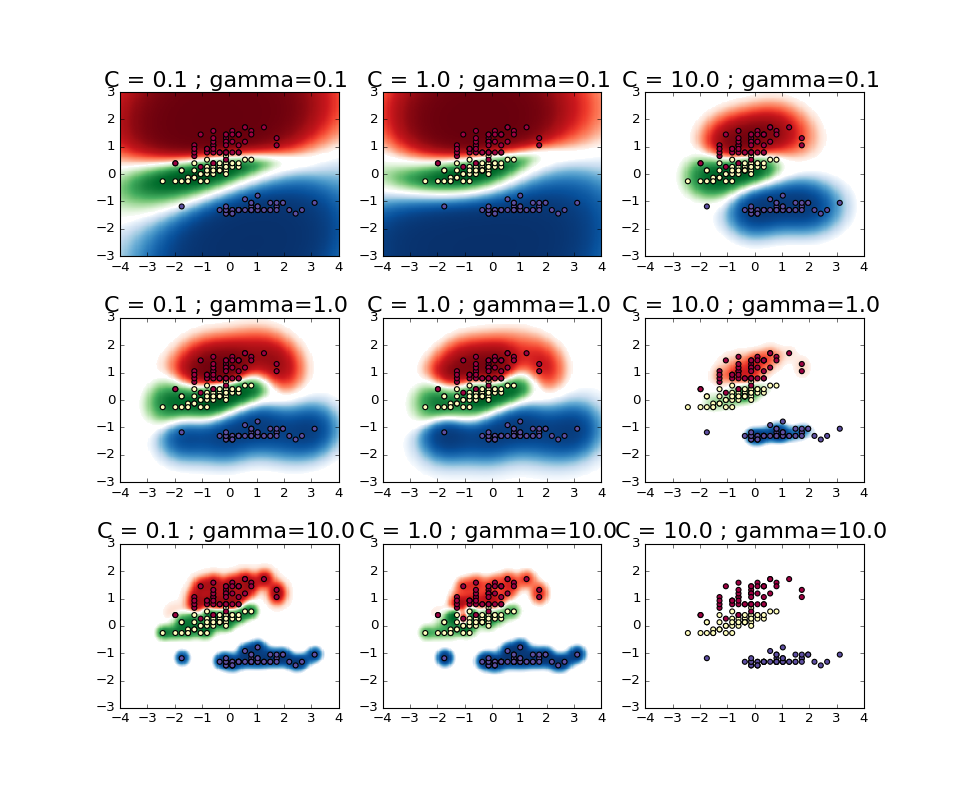

In [23]:
plt.figure(figsize=(12,10))

c=1
for gamma in [0.1,1.0,10.0]:
   for C in [0.1,1.0,10.0]:
       tmp_clf = SVC(kernel='rbf',C=C,gamma=gamma,probability=True)
       tmp_clf.fit(X3,y3)
       tmp_pred = tmp_clf.predict_proba(np.c_[xx.ravel(),yy.ravel()])
       tmp_Z = tmp_pred.reshape(201,201,3)
       tmp_Z[tmp_Z<0.5]=np.nan
       plt.imshow(tmp_Z[:,:,0],vmin=0.5,vmax=1.0,extent=[-4.0,4.0,-3.0,3.0],cmap='Blues',origin='bottom',alpha=1.0)
       plt.imshow(tmp_Z[:,:,1],vmin=0.5,vmax=1.0,extent=[-4.0,4.0,-3.0,3.0],cmap='Greens',origin='bottom',alpha=1.0)
       plt.imshow(tmp_Z[:,:,2],vmin=0.5,vmax=1.0,extent=[-4.0,4.0,-3.0,3.0],cmap='Reds',origin='bottom',alpha=1.0)
       plt.subplot(3,3,c)
       plt.scatter(X3.T[0],X3.T[1],c=y3,cmap='Spectral_r')
       plt.axis('scaled')
       plt.title('C = %s ; gamma=%s ' %(C,gamma),fontsize=20)
       plt.xlim(-4.0,4.0)
       plt.ylim(-3.0,3.0)
       c+=1

<p>For more information about the 'rbf' kernel have a look at the following webpage :</p>
http://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html